In [286]:
# import libraries
import pandas as pd # type: ignore
import os

In [287]:
# let's take a look at a dataset sample
loan_df = pd.read_csv("datasets/emprestimos-20201.csv")
loan_df.head(10)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,2962509,2007005628,NaN,2020/01/02 08:17:30.290000000,2020/01/07 11:14:07.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO
1,2962510,L202802,NaN,2020/01/02 08:17:30.391000000,2020/01/07 11:14:17.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO
2,2962511,2012008328,NaN,2020/01/02 08:17:30.436000000,2020/01/07 11:24:46.000000000,2.018103e+10,ALUNO DE PÓS-GRADUAÇÃO
3,2962512,2012055016,2020/01/17 09:56:18.380000000,2020/01/02 08:36:40.163000000,2020/01/31 14:53:52.000000000,2.019015e+10,ALUNO DE GRADUAÇÃO
4,2962513,L197391,2020/01/17 23:50:18.862000000,2020/01/02 09:36:03.877000000,2020/01/24 08:18:19.000000000,2.018005e+10,ALUNO DE GRADUAÇÃO
5,2962514,2016030245,2020/01/17 23:50:18.835000000,2020/01/02 09:36:03.938000000,2020/01/24 08:18:13.000000000,2.018005e+10,ALUNO DE GRADUAÇÃO
6,2962515,L153495,2020/01/15 08:47:19.222000000,2020/01/02 09:51:24.086000000,2020/01/28 12:00:15.000000000,1.756546e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
7,2962516,2008053151,2020/01/15 08:47:19.200000000,2020/01/02 09:51:24.121000000,2020/01/28 12:00:22.000000000,1.756546e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
8,2962517,2016035640,2020/01/15 08:47:19.174000000,2020/01/02 09:51:24.156000000,2020/01/29 12:18:08.000000000,1.756546e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
9,2962518,2011038368,2020/02/01 09:32:51.636000000,2020/01/02 09:54:30.086000000,2020/07/27 11:39:16.000000000,1.986240e+08,DOCENTE


In [288]:
# we have multiple CSVs, so we need to concatenate them into one single dataframe
data_path = "datasets/"
files = os.listdir(data_path)
loan_df = pd.read_csv(data_path+"emprestimos-20101.csv")
len_dfs = []
for file in files:
    if file.endswith(".csv"):
        path = data_path+file
        temp_df = pd.read_csv(path)
        len_dfs.append(len(temp_df))
        loan_df = pd.concat([loan_df, temp_df], ignore_index=True)

In [289]:
len(len_dfs)


21

In [290]:
# make sure that the concatenated dataframe got all of the data from the single dataframes
print(sum(len_dfs))
print(len(loan_df))

2258018
2353375


In [291]:
# we also want to get rid of the columns we are not interested in
#loan_df = loan_df.drop(["id_emprestimo"], axis=1)

loan_df.head(10)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
5,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
6,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
7,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO
9,709689,L157395,2010/01/19 15:59:26.447000000,2010/01/04 08:27:33.596000000,2010/02/03 13:06:43.125000000,2.009046e+09,ALUNO DE GRADUAÇÃO


In [292]:
# import books data
book_df = pd.read_parquet('datasets/dados_exemplares.parquet')
book_df.head(10)

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
7,13,L000924,Dissertações,Biblioteca Central Zila Mamede,REGULAR,651,18
8,12,L000056,Dissertações,Biblioteca Central Zila Mamede,NÃO CIRCULA,647,18
12,19,L116810_23/09/2020 00:01:33,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,661,32
13,20,L000088,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,683,33


In [293]:
# let's also get rid of some columns
book_df = book_df.drop(["registro_sistema"], axis=1)
book_df.head(10)

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao
index,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657
7,13,L000924,Dissertações,Biblioteca Central Zila Mamede,REGULAR,651
8,12,L000056,Dissertações,Biblioteca Central Zila Mamede,NÃO CIRCULA,647
12,19,L116810_23/09/2020 00:01:33,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,661
13,20,L000088,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,683


In [294]:
# now we can merge both datasets into a single one
df = pd.merge(loan_df, book_df, on='codigo_barras', how='inner')
print(len(df))
df.head(10)

2151968


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630
5,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647
6,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640
7,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686
9,709689,L157395,2010/01/19 15:59:26.447000000,2010/01/04 08:27:33.596000000,2010/02/03 13:06:43.125000000,2.009046e+09,ALUNO DE GRADUAÇÃO,57040,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,698


In [295]:
# checking if we have duplicated rows
sum(df.duplicated())

79446

In [296]:
# removing duplicated rows
df = df[~df.duplicated()].copy()
df.reset_index(drop=True, inplace=True)

In [297]:
# checking missing values
df.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1162077
data_emprestimo               0
data_devolucao             6178
matricula_ou_siape         2893
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
dtype: int64

In [298]:
# localization column groups
localization_classes = {
    "0": "Generalidades. Ciência e conhecimento",
    "1": "Filosofia e psicologia",
    "2": "Religião",
    "3": "Ciências sociais",
    "4": "Não definida",
    "5": "Matemática e ciências naturais",
    "6": "Ciências aplicadas",
    "7": "Belas artes",
    "8": "Linguagem. Língua. Linguística",
    "9": "Geografia. Biografia. História" 
}

def group_loc(cod): 
    num = str(int(cod/100)) # reduce the number to the interval 0 - 9
    return localization_classes[num]

In [299]:
# creating a new column using the localization classes
df["classe_localizacao"] = df["localizacao"].apply(group_loc)

In [300]:
# we need to convert the "matricula_ou_siape" column into String type
df["matricula_ou_siape"] = df["matricula_ou_siape"].apply(lambda x: str(x)[:-2])
df

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_localizacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,1149744,L133454,NaN,2011/12/30 17:38:05.838000000,2012/01/30 13:38:38.000000000,2010210883,ALUNO DE PÓS-GRADUAÇÃO,36689,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,654,Ciências aplicadas
2072518,1149745,2008053028,2012/01/30 09:07:40.289000000,2011/12/30 17:42:51.232000000,2012/02/29 13:39:55.000000000,1755267,DOCENTE,159775,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,635,Ciências aplicadas
2072519,1149746,2008053053,2012/01/30 09:06:19.941000000,2011/12/30 17:42:51.274000000,2012/02/13 14:28:37.000000000,1755267,DOCENTE,217526,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,662,Ciências aplicadas
2072520,1149747,2010066523,2012/01/15 19:06:56.012000000,2011/12/30 17:46:47.021000000,2012/01/19 11:30:36.000000000,2011056198,ALUNO DE GRADUAÇÃO,813168,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,604,Ciências aplicadas


In [301]:
import datetime
# convert the data_emprestimo column to datetime
df["data_emprestimo"] = pd.to_datetime(df["data_emprestimo"])

In [302]:
# create a new column for the year
df["ano"] = df["data_emprestimo"].dt.year

In [303]:
# we can see that, as expected, the same loan ID can be used more than once for different books. That's because, on a single loan, more than one book can be borrowed
df["id_emprestimo"].value_counts()

id_emprestimo
9690168    3
2422542    3
1752337    3
2010326    3
2772079    3
          ..
1638798    1
1638796    1
1638795    1
1638794    1
1638811    1
Name: count, Length: 2068724, dtype: int64

In [304]:
df[df["id_emprestimo"] == 9690168][["id_exemplar", "id_emprestimo"]]

,id_exemplar,id_emprestimo
1414176,1237700,9690168
1414177,1239476,9690168
1414178,1239477,9690168


In [305]:
# drop the loan id duplicates
df = df.drop_duplicates(subset=["id_emprestimo"])

In [306]:
df["id_emprestimo"].value_counts().sort_values()

id_emprestimo
709733     1
709734     1
709735     1
709736     1
709721     1
          ..
709709     1
709710     1
709711     1
709712     1
1149748    1
Name: count, Length: 2068724, dtype: int64

In [307]:
df_year = df["ano"].value_counts().sort_index()
df_year = df_year.reset_index()
df_year.columns = ['ano', 'emprestimos']

In [308]:
print(df_year)

     ano  emprestimos
0   2010       161282
1   2011       196202
2   2012       221142
3   2013       234437
4   2014       218774
5   2015       213118
6   2016       215413
7   2017       217975
8   2018       193547
9   2019       171299
10  2020        25535


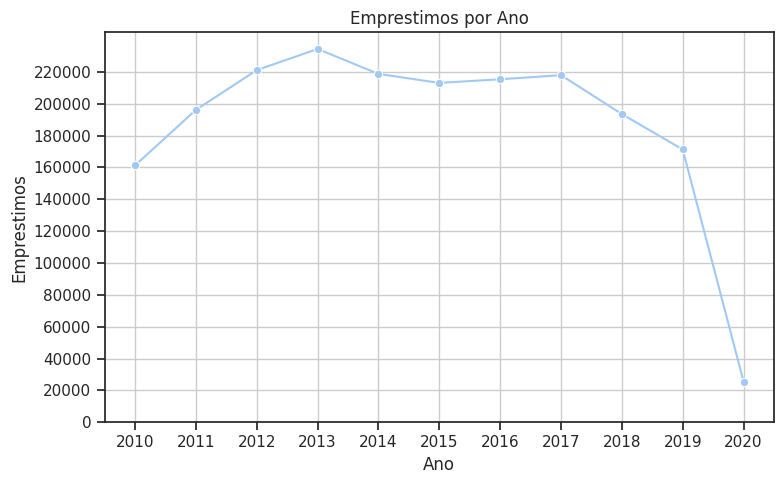

In [309]:
#  plot the number of books borrowed per year
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_year, x='ano', y='emprestimos', marker='o')
plt.title('Emprestimos por Ano')
plt.xlabel('Ano')
plt.ylabel('Emprestimos')
plt.yticks(np.arange(0, max(df_year["emprestimos"]) + 1, 20000))
plt.xticks(np.arange(min(df_year["ano"]), max(df_year["ano"]) + 1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("lineplot_emprestimos_ano")
plt.show()

In [310]:
# create a new column with the month name
df["mes"] = df["data_emprestimo"].dt.month_name(locale="pt_BR.utf-8")
df["mes"].unique()

/tmp/ipykernel_34381/258822184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mes"] = df["data_emprestimo"].dt.month_name(locale="pt_BR.utf-8")


array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [311]:
# make sure that the months are ordered
df['mes'] = pd.Categorical(df['mes'], 
                           categories=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
                                        'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
                           ordered=True)
df["mes"]

/tmp/ipykernel_34381/817798715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = pd.Categorical(df['mes'],


0           Janeiro
1           Janeiro
2           Janeiro
3           Janeiro
4           Janeiro
             ...   
2072517    Dezembro
2072518    Dezembro
2072519    Dezembro
2072520    Dezembro
2072521    Dezembro
Name: mes, Length: 2068724, dtype: category
Categories (12, object): ['Janeiro' < 'Fevereiro' < 'Março' < 'Abril' ... 'Setembro' < 'Outubro' < 'Novembro' < 'Dezembro']

In [312]:
df["mes"].value_counts()

mes
Março        251715
Agosto       232375
Fevereiro    209842
Abril        208339
Setembro     207878
Maio         202141
Outubro      188079
Novembro     163910
Junho        137816
Julho        123589
Dezembro      75642
Janeiro       67398
Name: count, dtype: int64

In [313]:
# loans per month
df_month = df["mes"].value_counts().reset_index(name="emprestimos")
# keep the right order or months
df_month

,mes,emprestimos
0,Março,251715
1,Agosto,232375
2,Fevereiro,209842
3,Abril,208339
4,Setembro,207878
5,Maio,202141
6,Outubro,188079
7,Novembro,163910
8,Junho,137816
9,Julho,123589


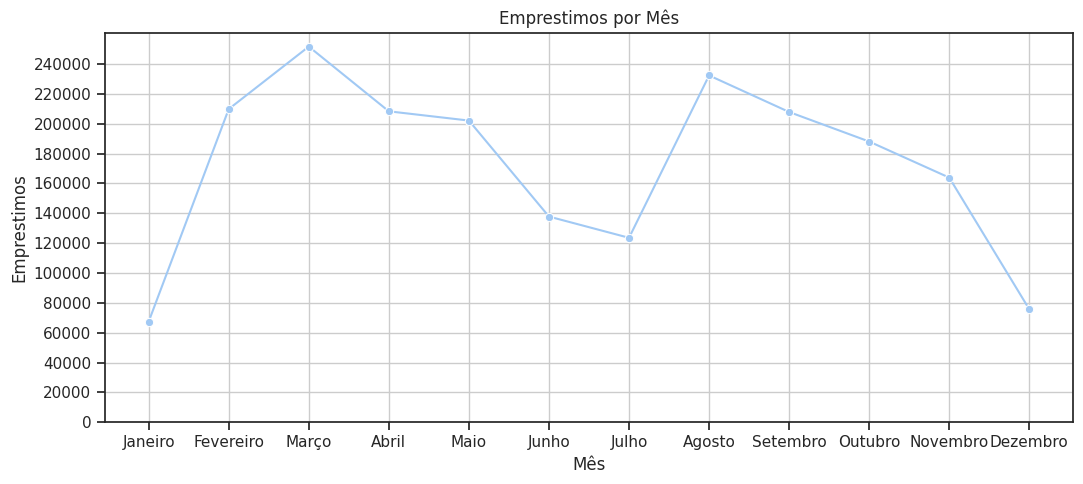

In [314]:
y_data = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

plt.figure(figsize=(11, 5))
sns.lineplot(data=df_month, x='mes', y="emprestimos", marker='o')
plt.title('Emprestimos por Mês')
plt.xlabel('Mês')
plt.ylabel('Emprestimos')
plt.yticks(np.arange(0, max(df_month["emprestimos"]) + 1, 20000))
plt.xticks(y_data)
plt.grid(True)
plt.tight_layout()
plt.savefig("lineplot_emprestimos_mes")
plt.show()

In [315]:
# make sure that the months are ordered
df['mes'] = pd.Categorical(df['mes'], 
                           categories=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
                                        'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
                           ordered=True)
df["mes"]

/tmp/ipykernel_34381/817798715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = pd.Categorical(df['mes'],


0           Janeiro
1           Janeiro
2           Janeiro
3           Janeiro
4           Janeiro
             ...   
2072517    Dezembro
2072518    Dezembro
2072519    Dezembro
2072520    Dezembro
2072521    Dezembro
Name: mes, Length: 2068724, dtype: category
Categories (12, object): ['Janeiro' < 'Fevereiro' < 'Março' < 'Abril' ... 'Setembro' < 'Outubro' < 'Novembro' < 'Dezembro']

In [316]:
df_month = df.groupby(['ano', 'mes']).size().reset_index(name="emprestimos")
df_month

/tmp/ipykernel_34381/2067924629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month = df.groupby(['ano', 'mes']).size().reset_index(name="emprestimos")


,ano,mes,emprestimos
0,2010,Janeiro,4699
1,2010,Fevereiro,10260
2,2010,Março,19623
3,2010,Abril,16343
4,2010,Maio,15883
...,...,...,...
127,2020,Agosto,0
128,2020,Setembro,0
129,2020,Outubro,0
130,2020,Novembro,0


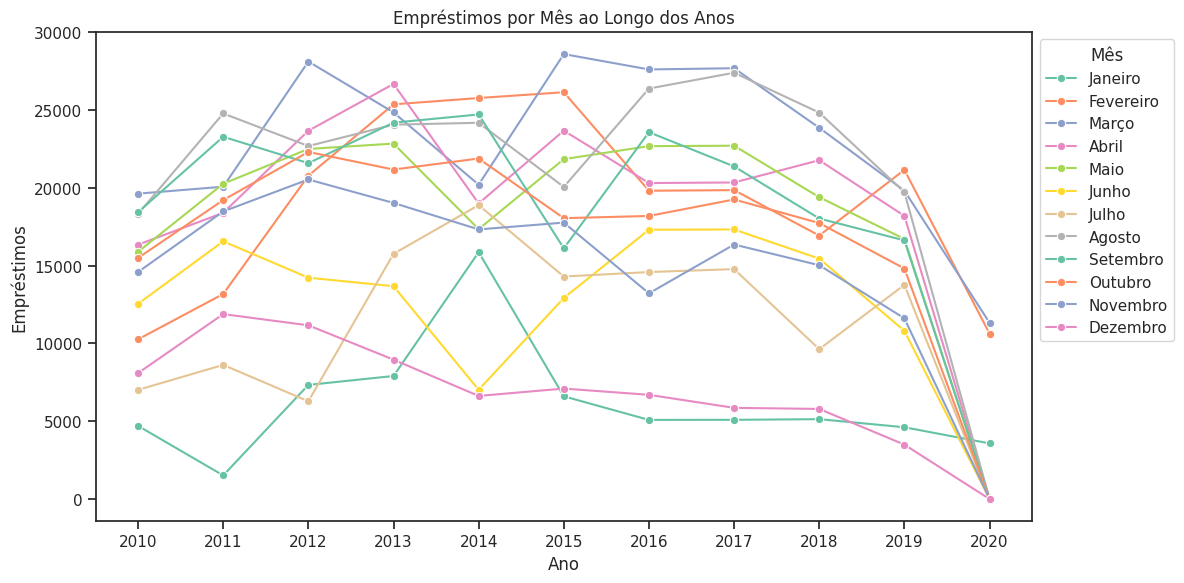

In [317]:
# plot the number of loans per month over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_month, x="ano", y="emprestimos", hue="mes", marker='o', palette="Set2")
sns.color_palette("pastel")
plt.title('Empréstimos por Mês ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Empréstimos')
plt.xticks(np.arange(min(df_month["ano"]), max(df_month["ano"]) + 1, 1))
plt.legend(title='Mês', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig("lineplot_emprestimos_ano_mes")
plt.show()

In [318]:
df["hora"] = df["data_emprestimo"].dt.hour
df["hora"]

/tmp/ipykernel_34381/1463413066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora"] = df["data_emprestimo"].dt.hour


0           7
1           7
2           8
3           8
4           8
           ..
2072517    17
2072518    17
2072519    17
2072520    17
2072521    18
Name: hora, Length: 2068724, dtype: int32

In [319]:
df_time = df["hora"].value_counts().sort_index().reset_index(name="emprestimos")
df_time

,hora,emprestimos
0,0,17
1,6,14
2,7,18736
3,8,103226
4,9,131032
5,10,185459
6,11,179719
7,12,148459
8,13,126757
9,14,150575


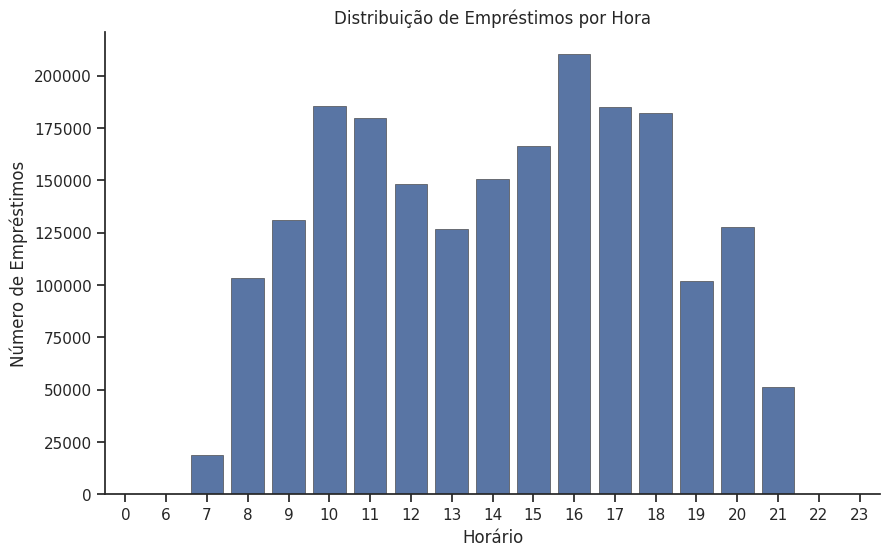

In [320]:
# plot the loans per hour
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10, 6))
sns.despine(f)

sns.barplot(
    data=df_time,
    x="hora",
    y="emprestimos",       
    edgecolor=".3",
    linewidth=0.5,
    ax=ax
)

ax.set_title("Distribuição de Empréstimos por Hora")
ax.set_xlabel("Horário")
ax.set_ylabel("Número de Empréstimos")
plt.savefig("barplot_emprestimos_hora")
plt.show()


There is a gradual decline in the number of book loans at the library.
The months with the highest demand for books are March and August.
The most suitable times for carrying out activities other than user service would be before 8 a.m. or after 9 p.m.

In [321]:
df["tipo_vinculo_usuario"].unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'DOCENTE EXTERNO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [322]:
def category_percentage(dataframe, column_name):
    """Calculates the percentage distribution of categories in a specified column.

    This function computes the frequency and corresponding percentage of each
    unique value in the specified column of the input DataFrame.

    Args:
        dataframe (pandas.DataFrame): The input DataFrame containing the data.
        column_name (str): The name of the column for which the category percentages will be calculated.

    Returns:
        pandas.DataFrame: A DataFrame with three columns:
            - `index`: The unique values from the specified column.
            - `emprestimos`: The count of each category.
            - `porcentagem`: The percentage representation of each category.
    """
    df_temp = dataframe[column_name].value_counts().reset_index(name="emprestimos")
    df_temp["porcentagem"] = round((df_temp["emprestimos"] / sum(df_temp["emprestimos"])) * 100, ndigits=2)

    return df_temp

In [323]:
df_user_category = category_percentage(df, "tipo_vinculo_usuario")
df_user_category

,tipo_vinculo_usuario,emprestimos,porcentagem
0,ALUNO DE GRADUAÇÃO,1609591,77.81
1,ALUNO DE PÓS-GRADUAÇÃO,301902,14.59
2,DOCENTE,70865,3.43
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,32128,1.55
4,ALUNO MÉDIO/TÉCNICO,27917,1.35
5,DOCENTE EXTERNO,23808,1.15
6,USUÁRIO EXTERNO,2508,0.12
7,OUTROS,5,0.00


In [324]:
df["colecao"].unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [325]:
df_colection = category_percentage(df, "colecao")
df_colection

,colecao,emprestimos,porcentagem
0,Acervo Circulante,2049408,99.07
1,Multimeios,7929,0.38
2,Monografias,4021,0.19
3,Dissertações,2404,0.12
4,Obras de Referência,1904,0.09
5,Publicações de Autores do RN,857,0.04
6,Publicações da UFRN,764,0.04
7,Teses,714,0.03
8,Folhetos,271,0.01
9,Necessidades Educacionais Específicas,130,0.01


In [326]:
df["biblioteca"].unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [327]:
df_library = category_percentage(df, "biblioteca")
df_library

,biblioteca,emprestimos,porcentagem
0,Biblioteca Central Zila Mamede,1423413,68.81
1,Biblioteca Setorial do Centro Ciências da Saúd...,118590,5.73
2,Biblioteca Setorial da Faculdade de Ciências d...,77584,3.75
3,Biblioteca Setorial Prof. Alberto Moreira Camp...,66441,3.21
4,Biblioteca Setorial Profª. Maria Lúcia da Cost...,61344,2.97
5,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,46017,2.22
6,Biblioteca Setorial do Centro de Ciências Huma...,40728,1.97
7,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,32096,1.55
8,Biblioteca Setorial Profª. Maria José Mamede G...,29032,1.40
9,Biblioteca Setorial Prof. Rodolfo Helinski - E...,26994,1.30


In [328]:
df["classe_localizacao"].unique()

array(['Ciências aplicadas', 'Linguagem. Língua. Linguística',
       'Ciências sociais', 'Geografia. Biografia. História',
       'Matemática e ciências naturais', 'Religião',
       'Generalidades. Ciência e conhecimento', 'Filosofia e psicologia',
       'Belas artes'], dtype=object)

In [329]:
df_cdu = category_percentage(df, "classe_localizacao")
df_cdu

,classe_localizacao,emprestimos,porcentagem
0,Ciências aplicadas,1423585,68.81
1,Ciências sociais,368692,17.82
2,Matemática e ciências naturais,68409,3.31
3,Generalidades. Ciência e conhecimento,62284,3.01
4,Religião,62169,3.01
5,Filosofia e psicologia,60308,2.92
6,Geografia. Biografia. História,7943,0.38
7,Belas artes,7870,0.38
8,Linguagem. Língua. Linguística,7464,0.36


To gain more accurate insights, we can conduct more specific analyses. For example, for a marketing campaign targeting social science books, we could study which libraries have the highest concentration of loans in this category. Alternatively, when planning an action focused on a specific library, analyzing the most sought-after book categories would be useful.
An important piece of information about the libraries that is missing from the database is their geographic location. The relevance of a library is tied not only to the number of loans it registers but also to the impact it generates in the region where it is located.

In [330]:
df[df["tipo_vinculo_usuario"]=="ALUNO DE GRADUAÇÃO"]["colecao"].value_counts()

colecao
Acervo Circulante                        1597478
Multimeios                                  4632
Monografias                                 3572
Dissertações                                1150
Obras de Referência                         1015
Publicações de Autores do RN                 593
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

In [331]:
df[df["tipo_vinculo_usuario"]=="ALUNO DE PÓS-GRADUAÇÃO"]["colecao"].value_counts()

colecao
Acervo Circulante                        298583
Dissertações                                934
Obras de Referência                         686
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                197
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Trabalho Acadêmico                           23
Coleção Mossoroense                          23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

For both users category, applied sciences is the most commum book class

In [332]:
# filtering the data for the analysis
df_grad = df[(df["tipo_vinculo_usuario"] == "ALUNO DE GRADUAÇÃO") & (df["colecao"] == "Acervo Circulante")]
df_post_grad = df[(df["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO") & (df["colecao"] == "Acervo Circulante")]

In [333]:
df_month_grad = df_grad.groupby(['ano', 'mes']).size().reset_index(name="emprestimos")
df_month_post_grad = df_post_grad.groupby(['ano', 'mes']).size().reset_index(name="emprestimos")

/tmp/ipykernel_34381/1021244712.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month_grad = df_grad.groupby(['ano', 'mes']).size().reset_index(name="emprestimos")
/tmp/ipykernel_34381/1021244712.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_month_post_grad = df_post_grad.groupby(['ano', 'mes']).size().reset_index(name="emprestimos")


In [334]:
df_month_grad.head(10)

,ano,mes,emprestimos
0,2010,Janeiro,2994
1,2010,Fevereiro,7764
2,2010,Março,15269
3,2010,Abril,12425
4,2010,Maio,12158
5,2010,Junho,9754
6,2010,Julho,4772
7,2010,Agosto,14657
8,2010,Setembro,14748
9,2010,Outubro,12274


In [335]:
df_month_post_grad.head(10)

,ano,mes,emprestimos
0,2010,Janeiro,1103
1,2010,Fevereiro,1474
2,2010,Março,2917
3,2010,Abril,2713
4,2010,Maio,2514
5,2010,Junho,1920
6,2010,Julho,1521
7,2010,Agosto,2221
8,2010,Setembro,2297
9,2010,Outubro,2025


In [336]:
def boxplot_year(dataframe, title=""):
    """
    Plots a boxplot of monthly loan distributions by year.

    This function generates a boxplot using Seaborn to visualize the distribution 
    of monthly loan counts across different years. It is useful for identifying trends, 
    variations, and outliers in loan activity over time.

    Args:
        dataframe (pd.DataFrame): A DataFrame containing at least the columns 
            'ano' (year) and 'emprestimos' (number of loans).
        title (str, optional): A title suffix to be added to the plot. 
            Typically used to distinguish user types (e.g., 'Undergraduate'). 
            Defaults to an empty string.

    Returns:
        None: This function only displays the plot.
    """
    sns.set_theme(style="ticks", palette="pastel")

    plt.figure(figsize=(12, 5))
    sns.boxplot(x="ano", y="emprestimos", data=dataframe)
    sns.despine(offset=10, trim=True)

    plt.title(f"Distribuição Mensal de Empréstimos - {title}")
    plt.xlabel("Ano")
    plt.ylabel("Número de Empréstimos")
    plt.tight_layout()
    plt.show()

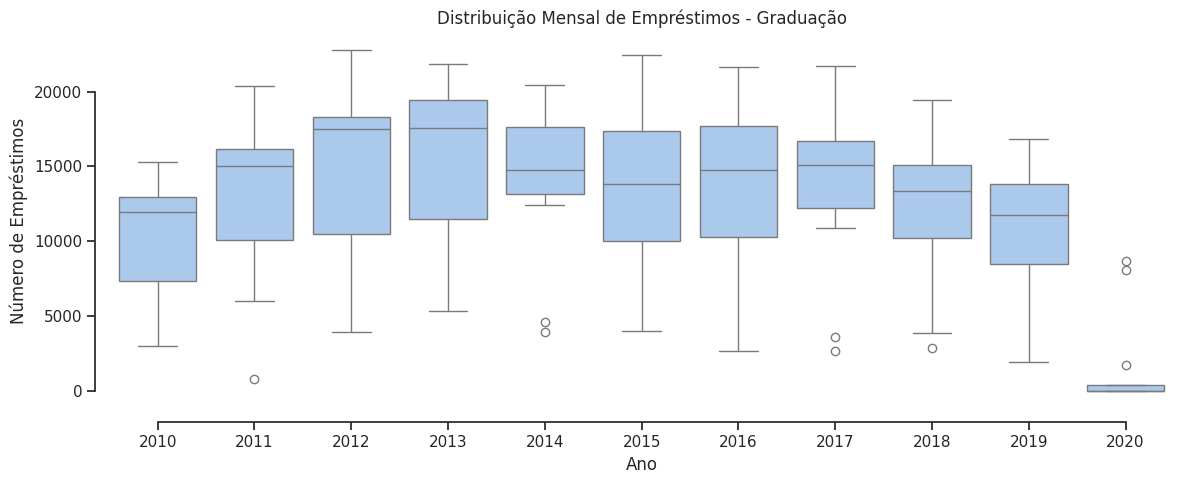

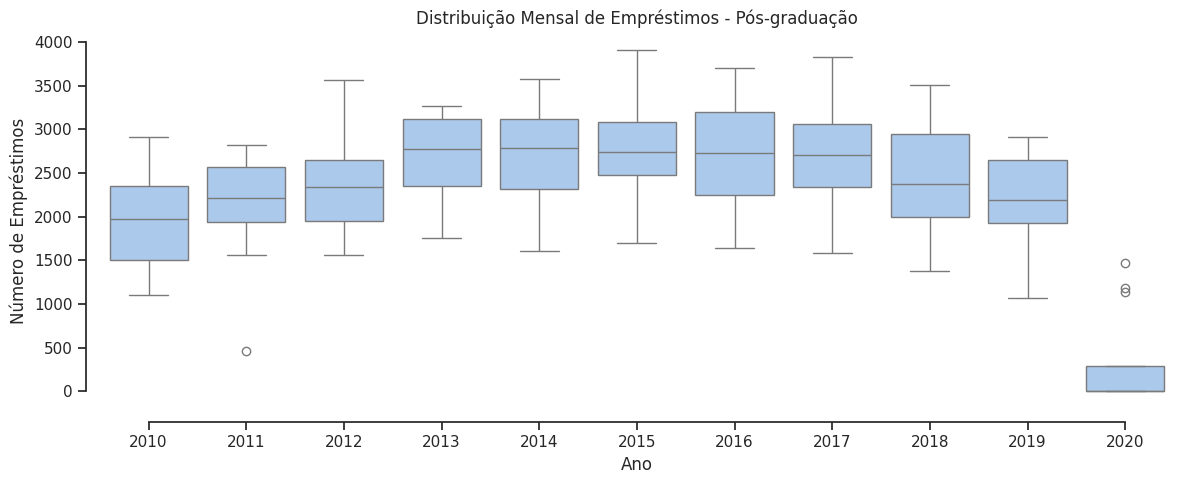

In [337]:
boxplot_year(df_month_grad, title="Graduação")
boxplot_year(df_month_post_grad, title="Pós-graduação")

- From 2010 to 2013, there was an increase in the number of loans.

- From 2014 to 2017, the numbers stabilized, though with some variation.

- From 2018 onward, there was a progressive decline, especially evident in 2020, possibly due to the impacts of the COVID-19 pandemic.

- The main difference between undergraduate and graduate data lies in the monthly dispersion, which is considerably lower in the graduate loan data. In addition, the variation in the annual median number of loans is also smaller for graduate students.

In [338]:
# load the first part of the student dataset
path = "datasets/matricula_alunos.xlsx"
student_df = pd.read_excel(path)
student_df.head(10)

,Matricula de alunos até 2010,Unnamed: 1,Unnamed: 2
0,Número da matrícula,Tipo de vinculo,Curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
6,200008125.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
7,200026310.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
8,200027286.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
9,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO


In [339]:
# set the first row as the header
student_df.columns = student_df.iloc[0]
student_df = student_df[1:]
student_df = student_df.reset_index(drop=True)


In [340]:
student_df

,Número da matrícula,Tipo de vinculo,Curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


In [341]:
# extract the json data
url = "https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsenc=p2ANqtz--p9jJrswGDm3o9XRZkCW1TkSOEJsC93Y4VmD1AD0ZIMgWTwNDDKoXbYCVHHiCqnx7uzeI1tl_RDZ1yP2Di5E4ApSFjOw&_hsmi=270881120&utm_content=270881120&utm_source=hs_automation"
user_agent = "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:138.0) Gecko/20100101 Firefox/138.0"
headers = {"User-Agent" : user_agent}

In [342]:
import requests
response = requests.get(url, headers)

In [343]:
data = response.json()
df_temp = pd.DataFrame(data)
df_temp

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [344]:
type(df_temp["registros"][0])

str

In [345]:
import json

# convert the column from string to actual list of dictionaries
df_temp["registros"] = df_temp["registros"].apply(json.loads)

In [346]:
type(df_temp["registros"][0])

list

In [347]:
df_undergrad = pd.DataFrame(df_temp["registros"][0])
df_undergrad.head(10)

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
5,200604856.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
6,2010042069.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7,2010031300.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
8,2009015177.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
9,200711601.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [348]:
df_grad = pd.DataFrame(df_temp["registros"][1])
df_grad.head(10)

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
5,2010112050.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
6,2010108781.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
7,2009204210.0,ALUNO DE PÓS-GRADUAÇÃO,BIOQUÍMICA
8,2009103512.0,ALUNO DE PÓS-GRADUAÇÃO,ADMINISTRAÇÃO
9,2009203106.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"


In [349]:
print(student_df["Tipo de vinculo"].value_counts())
print(df_undergrad["tipo_vinculo_usuario"].value_counts())
print(df_grad["tipo_vinculo_usuario"].value_counts())

Tipo de vinculo
ALUNO DE GRADUAÇÃO    7726
Name: count, dtype: int64
tipo_vinculo_usuario
ALUNO DE GRADUAÇÃO    62802
Name: count, dtype: int64
tipo_vinculo_usuario
ALUNO DE PÓS-GRADUAÇÃO    19440
Name: count, dtype: int64


In [350]:
student_df.columns = df_undergrad.columns
student_df

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


In [351]:
n_df = pd.concat([df_undergrad, student_df, df_grad], ignore_index=True)
n_df

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
89963,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
89964,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
89965,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
89966,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [352]:
print(sum(n_df.duplicated()))
print(sum(n_df["matricula_ou_siape"].isna()))

0
0


In [353]:
n_df["matricula_ou_siape"] = n_df["matricula_ou_siape"].apply(lambda x: str(x)[:-2])

In [354]:
n_df.head(10)

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
5,200604856,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
6,2010042069,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7,2010031300,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
8,2009015177,ALUNO DE GRADUAÇÃO,AGRONOMIA
9,200711601,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [355]:
# join the tables
n_df.drop(columns=["tipo_vinculo_usuario"], inplace=True)
df = pd.merge(df, n_df, on="matricula_ou_siape", how="inner")
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_localizacao,ano,mes,hora,curso
0,709684,L095049,NaN,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas,2010,Janeiro,7,ENGENHARIA QUÍMICA
1,709685,L167050,NaN,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas,2010,Janeiro,7,ENGENHARIA QUÍMICA
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010-01-04 08:08:44.081,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas,2010,Janeiro,8,CIÊNCIAS ODONTOLÓGICAS
3,709687,L184117,2010/01/18 11:07:46.470000000,2010-01-04 08:24:21.284,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas,2010,Janeiro,8,GEOGRAFIA
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010-01-04 08:27:33.569,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas,2010,Janeiro,8,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS


In [356]:
sum(df["curso"].isna())

0

In [357]:
# filtering loan by year and course
courses = ['FILOSOFIA', 'DIREITO', 'BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS', 'PEDAGOGIA', 'COMUNICAÇÃO SOCIAL']
temp_df = df[df["curso"].isin(courses)]
temp_df = temp_df[temp_df["ano"] >= 2015]
course_df = temp_df.groupby(["curso", "ano"]).size().reset_index(name="emprestimos")
course_df.head(10)

,curso,ano,emprestimos
0,BIBLIOTECONOMIA,2015,7609
1,BIBLIOTECONOMIA,2016,6986
2,BIBLIOTECONOMIA,2017,7279
3,BIBLIOTECONOMIA,2018,6366
4,BIBLIOTECONOMIA,2019,5864
5,BIBLIOTECONOMIA,2020,897
6,CIÊNCIAS SOCIAIS,2015,7336
7,CIÊNCIAS SOCIAIS,2016,6942
8,CIÊNCIAS SOCIAIS,2017,6892
9,CIÊNCIAS SOCIAIS,2018,6167


In [358]:
# create pivot table
table = course_df.pivot_table(index="curso",
                        columns="ano", 
                        values="emprestimos",  
                        aggfunc="sum",
                        margins = True,
                        margins_name = 'total')
table

ano,2015,2016,2017,2018,2019,2020,total
curso,,,,,,,
BIBLIOTECONOMIA,7609,6986,7279,6366,5864,897,35001
CIÊNCIAS SOCIAIS,7336,6942,6892,6167,5775,824,33936
COMUNICAÇÃO SOCIAL,7023,7942,8227,6933,5866,794,36785
DIREITO,7494,7309,7848,7000,5843,904,36398
FILOSOFIA,9715,9838,9543,8327,7325,1132,45880
PEDAGOGIA,7179,7139,7420,6510,5858,864,34970
total,46356,46156,47209,41303,36531,5415,222970


In [359]:
# loading dataset of 2022 prediction
prediction_df = pd.read_table("datasets/previsao", sep=" ")
prediction_df.head()

,curso,previsao_2022
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090


In [360]:
# filtering the dataset
years = [2017, 2018, 2019]
postgrad_df = df[(df["ano"].isin(years)) & (df["tipo_vinculo_usuario"] == "ALUNO DE PÓS-GRADUAÇÃO")]
postgrad_df["ano"].unique()

array([2019, 2018, 2017], dtype=int32)

In [361]:
postgrad_df["tipo_vinculo_usuario"].value_counts()

tipo_vinculo_usuario
ALUNO DE PÓS-GRADUAÇÃO    88012
Name: count, dtype: int64

In [362]:
postgrad_df["curso"] = postgrad_df["curso"].apply(lambda x: x.capitalize())
postgrad_df["curso"]

/tmp/ipykernel_34381/3340043940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postgrad_df["curso"] = postgrad_df["curso"].apply(lambda x: x.capitalize())


222177     Gestão da informação e do conhecimento
222178     Gestão da informação e do conhecimento
222179     Gestão da informação e do conhecimento
222183                     Ciências odontológicas
222187                           Engenharia civil
                            ...                  
1638728                            Bioinformática
1638729                            Bioinformática
1638730                            Bioinformática
1638732                                    Design
1638733                                    Design
Name: curso, Length: 88012, dtype: object

In [363]:
course_year_loans_df = postgrad_df.groupby(["curso", "ano"]).size().reset_index(name="emprestimos")
course_year_loans_df

,curso,ano,emprestimos
0,Administração,2017,2531
1,Administração,2018,2313
2,Administração,2019,1689
3,Arquitetura e urbanismo,2017,2200
4,Arquitetura e urbanismo,2018,1910
5,Arquitetura e urbanismo,2019,1813
6,Artes cênicas,2017,2109
7,Artes cênicas,2018,2079
8,Artes cênicas,2019,1808
9,Bioinformática,2017,2183


In [364]:
# calculates de percentage difference between the given years for each course
def calc_diff_perc (dataframe, years):
    diff_year_dict = {
        "curso":[],
        "anos":[],
        "diferenca_porcentagem": []
    }
    
    for course in list(dataframe["curso"].unique()):
        for year in years:
            loans_year = int(dataframe[(dataframe["curso"] == course) & (dataframe["ano"] == year)]["emprestimos"].values[0])
            loans_next_year = int(dataframe[(dataframe["curso"] == course) & (dataframe["ano"] == year+1)]["emprestimos"].values[0])
            diff_year_dict["diferenca_porcentagem"].append(round(((loans_year-loans_next_year)/loans_year)*100, 2))
            diff_year_dict["curso"].append(course)
            diff_year_dict["anos"].append(f"{year}-{year+1}")

    return pd.DataFrame(diff_year_dict)

In [365]:
years.pop() # remove 2019, bc we only want the 2018-2019 diff
diff_df = calc_diff_perc(course_year_loans_df, years)
diff_df

,curso,anos,diferenca_porcentagem
0,Administração,2017-2018,8.61
1,Administração,2018-2019,26.98
2,Arquitetura e urbanismo,2017-2018,13.18
3,Arquitetura e urbanismo,2018-2019,5.08
4,Artes cênicas,2017-2018,1.42
5,Artes cênicas,2018-2019,13.04
6,Bioinformática,2017-2018,12.46
7,Bioinformática,2018-2019,4.81
8,Bioquímica,2017-2018,15.18
9,Bioquímica,2018-2019,-5.78


In [366]:
# sort the values of course column alphabetically
diff_df_course_values = sorted(diff_df["curso"].unique())
diff_df_course_values

['Administração',
 'Arquitetura e urbanismo',
 'Artes cênicas',
 'Bioinformática',
 'Bioquímica',
 'Ciência e engenharia de materiais',
 'Ciência, tecnologia e inovação',
 'Ciências da saúde',
 'Ciências odontológicas',
 'Design',
 'Engenharia civil',
 'Engenharia de software',
 'Filosofia',
 'Gestão da informação e do conhecimento']

In [367]:
# sort the rows by the values of course column alphabetically
prediction_df = prediction_df.sort_values(by="curso").reset_index(drop=True)
prediction_df

,curso,previsao_2022
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [368]:
prediction_df["curso"] = diff_df_course_values
prediction_df

,curso,previsao_2022
0,Administração,1905
1,Arquitetura e urbanismo,1896
2,Artes cênicas,1920
3,Bioinformática,2302
4,Bioquímica,2090
5,Ciência e engenharia de materiais,2010
6,"Ciência, tecnologia e inovação",1960
7,Ciências da saúde,1730
8,Ciências odontológicas,2405
9,Design,1900


In [369]:
course_year_loans_df[course_year_loans_df["ano"] == 2019]

,curso,ano,emprestimos
2,Administração,2019,1689
5,Arquitetura e urbanismo,2019,1813
8,Artes cênicas,2019,1808
11,Bioinformática,2019,1819
14,Bioquímica,2019,2051
17,Ciência e engenharia de materiais,2019,2002
20,"Ciência, tecnologia e inovação",2019,2023
23,Ciências da saúde,2019,1821
26,Ciências odontológicas,2019,2128
29,Design,2019,1836


In [370]:
diff_year_dict = {
        "curso":[],
        "anos":[],
        "diferenca_porcentagem": []
    }
    
for course in list(course_year_loans_df["curso"].unique()):
    loans_year = int(course_year_loans_df[(course_year_loans_df["curso"] == course) & (course_year_loans_df["ano"] == 2019)]["emprestimos"].values[0])
    loans_next_year = int(prediction_df[prediction_df["curso"] == course]["previsao_2022"].values[0])
    diff_year_dict["diferenca_porcentagem"].append(round(((loans_year-loans_next_year)/loans_year)*100, 2))
    diff_year_dict["curso"].append(course)
    diff_year_dict["anos"].append(f"{2019}-{2022}")

diff_df_19_22 = pd.DataFrame(diff_year_dict)
diff_df_19_22

,curso,anos,diferenca_porcentagem
0,Administração,2019-2022,-12.79
1,Arquitetura e urbanismo,2019-2022,-4.58
2,Artes cênicas,2019-2022,-6.19
3,Bioinformática,2019-2022,-26.55
4,Bioquímica,2019-2022,-1.90
5,Ciência e engenharia de materiais,2019-2022,-0.40
6,"Ciência, tecnologia e inovação",2019-2022,3.11
7,Ciências da saúde,2019-2022,5.00
8,Ciências odontológicas,2019-2022,-13.02
9,Design,2019-2022,-3.49


In [371]:
diff_df = pd.concat([diff_df, diff_df_19_22], ignore_index=True)
diff_df = diff_df.sort_values(by="curso").reset_index(drop=True)
diff_df["diferenca_porcentagem"] = diff_df["diferenca_porcentagem"].apply(lambda x: str(x)+"%")
diff_df

,curso,anos,diferenca_porcentagem
0,Administração,2017-2018,8.61%
1,Administração,2018-2019,26.98%
2,Administração,2019-2022,-12.79%
3,Arquitetura e urbanismo,2017-2018,13.18%
4,Arquitetura e urbanismo,2018-2019,5.08%
5,Arquitetura e urbanismo,2019-2022,-4.58%
6,Artes cênicas,2019-2022,-6.19%
7,Artes cênicas,2017-2018,1.42%
8,Artes cênicas,2018-2019,13.04%
9,Bioinformática,2018-2019,4.81%


In [372]:
diff_df_no_index = diff_df.style.hide(axis="index")
diff_df_no_index

curso,anos,diferenca_porcentagem
Administração,2017-2018,8.61%
Administração,2018-2019,26.98%
Administração,2019-2022,-12.79%
Arquitetura e urbanismo,2017-2018,13.18%
Arquitetura e urbanismo,2018-2019,5.08%
Arquitetura e urbanismo,2019-2022,-4.58%
Artes cênicas,2019-2022,-6.19%
Artes cênicas,2017-2018,1.42%
Artes cênicas,2018-2019,13.04%
Bioinformática,2018-2019,4.81%


In [373]:
def color_percentage(percentage):
    if percentage[0] == "-":
        color = "red"
    else:
        color = "green"

    return f"color: {color};"

In [375]:
styled_result = diff_df_no_index.map(color_percentage, subset="diferenca_porcentagem")
styled_result.to_html()

'<style type="text/css">\n#T_488c4_row0_col2, #T_488c4_row1_col2, #T_488c4_row3_col2, #T_488c4_row4_col2, #T_488c4_row7_col2, #T_488c4_row8_col2, #T_488c4_row9_col2, #T_488c4_row11_col2, #T_488c4_row12_col2, #T_488c4_row15_col2, #T_488c4_row16_col2, #T_488c4_row18_col2, #T_488c4_row19_col2, #T_488c4_row20_col2, #T_488c4_row21_col2, #T_488c4_row22_col2, #T_488c4_row23_col2, #T_488c4_row24_col2, #T_488c4_row29_col2, #T_488c4_row30_col2, #T_488c4_row31_col2, #T_488c4_row32_col2, #T_488c4_row33_col2, #T_488c4_row34_col2, #T_488c4_row36_col2, #T_488c4_row37_col2, #T_488c4_row39_col2, #T_488c4_row40_col2 {\n  color: green;\n  color: green;\n}\n#T_488c4_row2_col2, #T_488c4_row5_col2, #T_488c4_row6_col2, #T_488c4_row10_col2, #T_488c4_row13_col2, #T_488c4_row14_col2, #T_488c4_row17_col2, #T_488c4_row25_col2, #T_488c4_row26_col2, #T_488c4_row27_col2, #T_488c4_row28_col2, #T_488c4_row35_col2, #T_488c4_row38_col2, #T_488c4_row41_col2 {\n  color: red;\n  color: red;\n}\n</style>\n<table id="T_488c4